In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler os dados do arquivo CSV
file_path = 'csv/forks_year_projetos.csv'
df = pd.read_csv(file_path)

# Converter a coluna 'created' para datetime
df['created'] = pd.to_datetime(df['created'])
df['updated'] = pd.to_datetime(df['updated'])

# Extrair ano de criação
df['year'] = df['created'].dt.year
df['year2'] = df['updated'].dt.year

# Calcular contagem de criações por projeto e ano
project_year_counts = df.groupby(['project', 'year']).size().reset_index(name='count')
projectup_year_counts = df.groupby(['project', 'year2']).size().reset_index(name='count')


# unique_projects = project_year_counts['project'].unique()

# for project in unique_projects:
#     project_data = project_year_counts[project_year_counts['project'] == project]
#     plt.plot(project_data['year'].values, project_data['count'].values, label=project)

# plt.xlabel('Ano de Criação')
# plt.ylabel('Quantidade de Criações')
# plt.title('Quantidade de Criações por Projeto e Ano')
# plt.legend()
# plt.grid(True)
# plt.show()

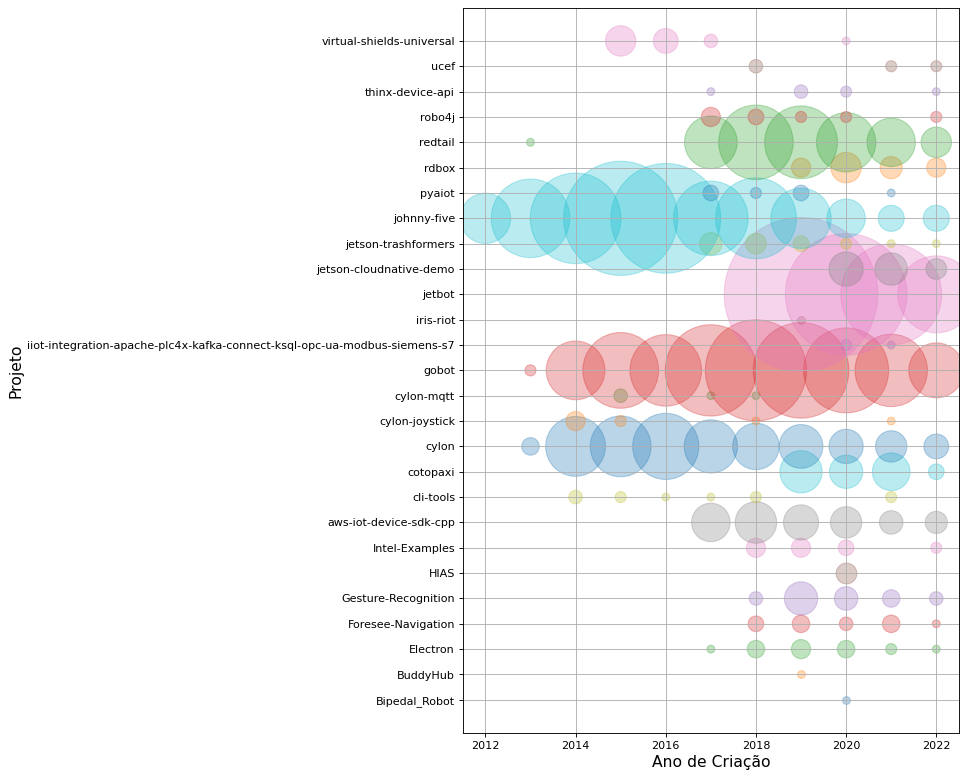

In [72]:
unique_projects = project_year_counts['project'].unique()

plt.figure(figsize=(8, 12), dpi=80)

for project in unique_projects:
    project_data = project_year_counts[project_year_counts['project'] == project]
    plt.scatter(
        project_data['year'].values,
        [project] * len(project_data),  # Replicar o nome do projeto para eixo y
        s=project_data['count'].values * 50,  # Usar o tamanho das bolhas para a contagem
        alpha=0.3
    )

plt.xlabel('Ano de Criação', fontsize=14)
plt.ylabel('Projeto', fontsize=14)
plt.grid(True)

plt.savefig("figs/demografics-projects.pdf")

plt.show()

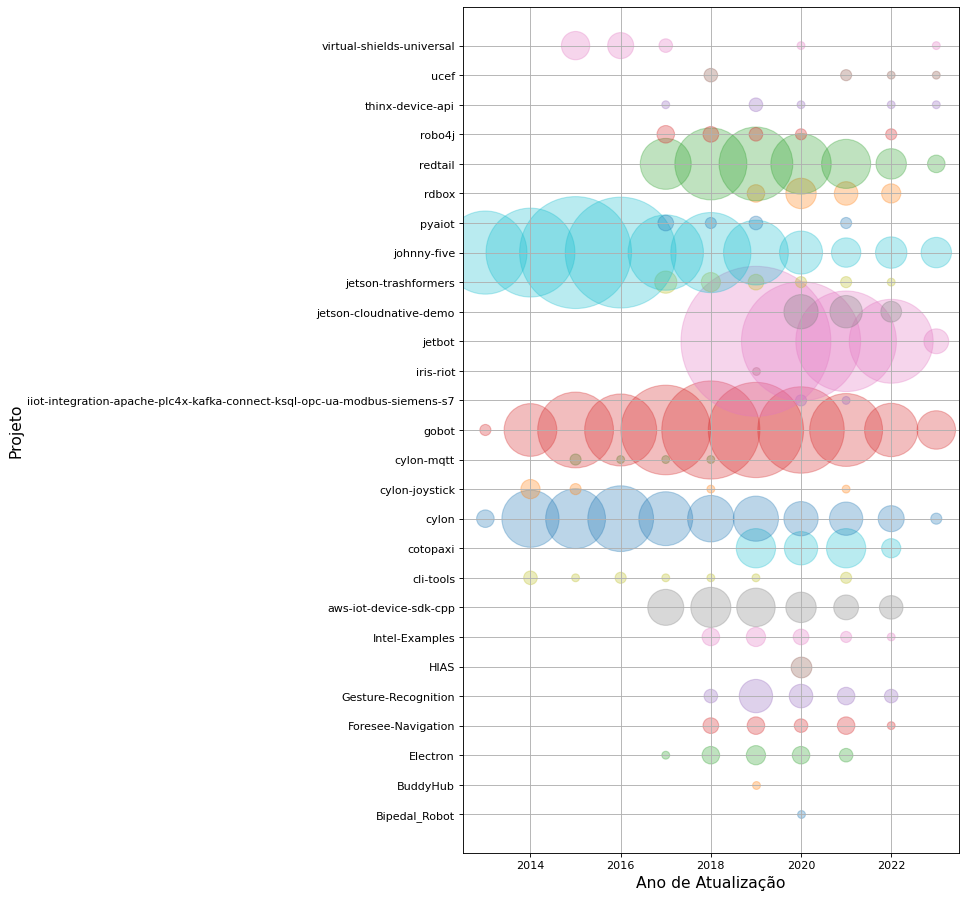

In [71]:
unique_projects = project_year_counts['project'].unique()

plt.figure(figsize=(8, 14), dpi=80)

for project in unique_projects:
    projectup_data = projectup_year_counts[projectup_year_counts['project'] == project]
    plt.scatter(
        projectup_data['year2'].values,
        [project] * len(projectup_data),  # Replicar o nome do projeto para eixo y
        s=projectup_data['count'].values * 50,  # Usar o tamanho das bolhas para a contagem
        alpha=0.3
    )

plt.xlabel('Ano de Atualização', fontsize=14)
plt.ylabel('Projeto', fontsize=14)
plt.grid(True)

plt.savefig("figs/demografics-projects-atualizacao.pdf")

plt.show()